In [1]:
import bandit as b
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
from BaseAgent import AbstractAgent
np.random.seed(0)

C:\Users\shani\AppData\Local\Temp\ipykernel_13480\1347034621.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Multi-Armed Bandits: 

Three medicine where the effectiveness varies randomly over time. 

non-stationary MAB scenario? bc the reward distributions are changing over time.

In [2]:
bandit_final_env =b.Bandits_final()

The agent implements a variant of the Upper Confidence Bound (UCB) algorithm, a popular method in multi-armed bandit problems. It uses a sliding window mechanism to adapt to potentially non-stationary environments (where the properties of the environment can change over time).

1. Action Selection with UCB: This part calculates the Upper Confidence Bound for each action (or "arm") based on recent rewards. It balances exploration (trying new actions) and exploitation (using actions known to yield high rewards). Actions with fewer trials or high uncertainty get a "bonus" to their estimated value, encouraging exploration.
2. Sliding Window: This mechanism ensures that the agent's decisions are based on recent experiences by maintaining a fixed-size list of the most recent rewards for each action. This helps adapt to changes in the environment's dynamics.
3. Learning from Interaction: After performing an action and observing a reward, the agent updates its knowledge (the sliding windows of rewards)

In [3]:

class SlidingWindowUCB:
    def __init__(self, k, window_size=50, c=1):
        self.k = k
        self.window_size = window_size
        self.c = c
        self.windows = {i: [] for i in range(k)}
        self.t = 0
    
    def select_action(self):
        self.t += 1
        ucb_values = []
        for arm in range(self.k):
            rewards = self.windows[arm]
            if len(rewards) < 1:
                ucb_values.append(float('inf'))
            else:
                mean_reward = np.mean(rewards)
                bonus = self.c * np.sqrt(np.log(self.t) / len(rewards))
                ucb_values.append(mean_reward + bonus)
        return np.argmax(ucb_values)
    
    def update(self, action, reward):
        rewards = self.windows[action]
        if len(rewards) >= self.window_size:
            rewards.pop(0)
        rewards.append(reward)




In [20]:
def sliding_window_ucb(env, k, window_sizes, cs, num_episodes=1000):
    results = {}
    for window_size in window_sizes:
        for c in cs:
            agent = SlidingWindowUCB(k=k, window_size=window_size, c=c)
            total_rewards = 0
            rewards_per_episode = []  # Optional: track rewards for each episode
            cumulative_rewards = []  # Track cumulative rewards for each arm

            for episode in range(num_episodes):
                obs, reward, terminated, _,_ = env.reset()  # Initial reset for each episode
                episode_reward = 0  # Reset episode reward
                
                while not terminated:
                    action = agent.select_action()
                    _, reward, terminated, _, _ = env.step(action)
                    agent.update(action, reward)
                    episode_reward += reward
                
                total_rewards += episode_reward
                rewards_per_episode.append(episode_reward)  # Store episode reward
                cumulative_rewards.append(total_rewards)

            avg_reward = total_rewards / num_episodes
            results[(window_size, c)] = {
                'total_rewards': total_rewards,
                'average_reward': avg_reward,
                'rewards_per_episode': rewards_per_episode,
                'cumulative_rewards': cumulative_rewards
            }
            print(f"Window Size: {window_size}, c: {c}, Total Reward: {total_rewards}, Average Reward: {avg_reward}")

    return results

# Example usage of the function
env = bandit_final_env  
k = 3 
window_sizes = [50,1000, 10000]  # Different window sizes to test
cs = [0.5, 1,10]  # Different values of exploration parameter c to test
test_results = sliding_window_ucb(env, k, window_sizes, cs)


Window Size: 50, c: 0.5, Total Reward: 4301.905719469142, Average Reward: 4.301905719469143
Window Size: 50, c: 1, Total Reward: 4766.168414969814, Average Reward: 4.766168414969814
Window Size: 50, c: 10, Total Reward: 4859.588969526351, Average Reward: 4.859588969526351
Window Size: 1000, c: 0.5, Total Reward: 4121.89366565424, Average Reward: 4.12189366565424
Window Size: 1000, c: 1, Total Reward: 3549.665625605041, Average Reward: 3.549665625605041
Window Size: 1000, c: 10, Total Reward: 3167.630988921142, Average Reward: 3.1676309889211423
Window Size: 10000, c: 0.5, Total Reward: 3589.9554385728634, Average Reward: 3.5899554385728636
Window Size: 10000, c: 1, Total Reward: 3968.8534954106162, Average Reward: 3.9688534954106163
Window Size: 10000, c: 10, Total Reward: 2849.2259924550413, Average Reward: 2.8492259924550414


In [21]:
test_results[(50,0.5)]['cumulative_rewards']

[3.7591840036528175,
 1.9992037175350965,
 4.858337183932857,
 9.364016420684944,
 14.370679054809003,
 18.249057283947117,
 22.63514361129912,
 26.340899048619587,
 30.242551603386627,
 34.00032816372326,
 39.02663159409116,
 42.83159634523784,
 45.65923373241068,
 49.07446657868385,
 52.15056677005928,
 55.417613979497524,
 58.75895304816079,
 61.58070247915052,
 63.46379038057228,
 68.22430221858919,
 73.44648896695712,
 77.46859968863728,
 81.99779019133601,
 85.74266219314913,
 90.86558520579992,
 94.81896133245958,
 98.8441226258812,
 100.69072628298778,
 104.57802691066917,
 109.72281449474426,
 114.16633684243337,
 118.41907812766952,
 125.49540453112273,
 130.44100217054554,
 135.6141332792511,
 139.82536795571485,
 145.19652701309943,
 149.8522896373996,
 153.6636813098504,
 157.29349295325557,
 162.33324991764556,
 166.2794156008763,
 171.36660000157767,
 174.49465660882962,
 177.66181641741153,
 182.83664309598734,
 185.8872009207934,
 189.0110420106225,
 192.8959753548863,

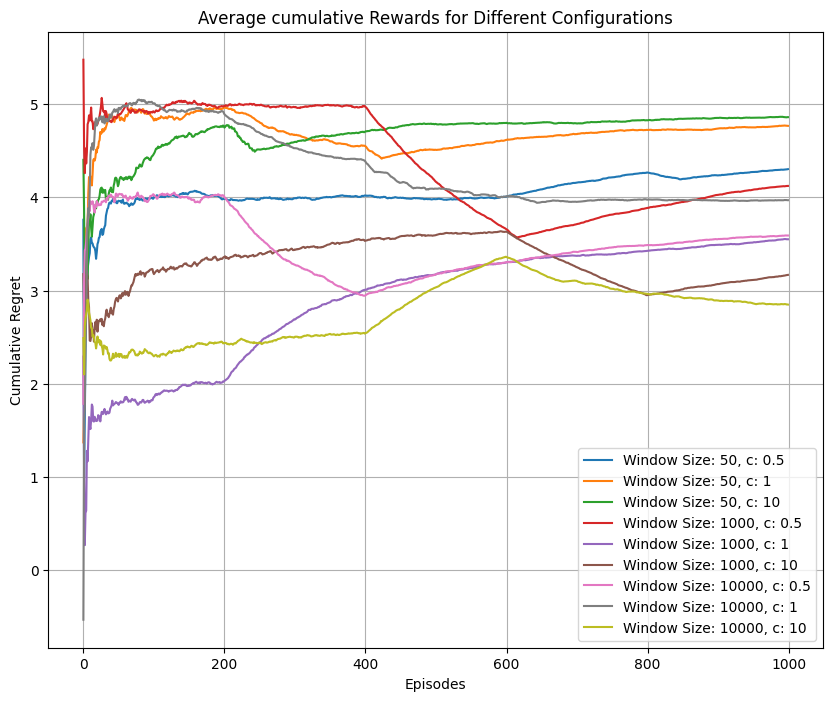

In [30]:
def plot_cumulative_regret(results, window_sizes, cs, optimal_reward):
    plt.figure(figsize=(10, 8))

    for window_size in window_sizes:
        for c in cs:
            key = (window_size, c)
            if key in results:
                result = results[key]
                cumulative_rewards = np.array(result['cumulative_rewards'])
                average_cumulative_rewards = cumulative_rewards / np.arange(1, len(cumulative_rewards) + 1)
                episodes = np.arange(len(cumulative_rewards)) + 1  # +1 because episodes start at 1 not 0
                #cumulative_optimal = optimal_reward * episodes
                #cumulative_regret = cumulative_optimal - cumulative_rewards

                plt.plot(average_cumulative_rewards, label=f"Window Size: {window_size}, c: {c}")
                #best_reward = np.max(result['cumulative_rewards'])
                
                

    plt.title("Average cumulative Rewards for Different Configurations")
    plt.xlabel("Episodes")
    plt.ylabel("Cumulative reward per episode")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
optimal_reward = 6  # This would be the maximum average reward per step observed or expected
plot_cumulative_regret(test_results, [50,1000, 10000], [0.5, 1,10], optimal_reward)


In [12]:
test_results

{(50, 0.5): {'total_rewards': 3666.6260485735284,
  'average_reward': 3.6666260485735283,
  'rewards_per_episode': [3.53279891786398,
   3.677701392477486,
   3.1305453749432286,
   2.6316961294118872,
   5.0321557403744395,
   2.7343432881792915,
   3.1785265097508404,
   5.800902161134765,
   3.4820732176836984,
   4.55947987593166,
   2.98132186413787,
   3.4832135959758803,
   4.448247819598361,
   3.464610451975119,
   5.530582545264146,
   5.365388817835243,
   3.6233081637828666,
   4.829773443116709,
   5.265674836022045,
   6.000751538752164,
   4.551127164958796,
   3.609476127751245,
   2.159688474652312,
   2.120815231001722,
   2.436471551815986,
   5.768358390955299,
   4.805142936773566,
   4.651930805872945,
   5.036385831383574,
   4.942846202036897,
   3.733346910734753,
   4.611222460774059,
   5.084684256780583,
   3.975463522248246,
   3.673203103093317,
   2.1991703255803254,
   2.538062764404576,
   2.729094422385395,
   4.741121396595162,
   3.0886762197594333,


In [7]:

def find_best_c_per_window(results):
    best_c_per_window = {}
    for (window_size, c), data in results.items():
        if window_size not in best_c_per_window or best_c_per_window[window_size]['average_reward'] < data['average_reward']:
            best_c_per_window[window_size] = {
                'c': c,
                'average_reward': data['average_reward']
            }
    return best_c_per_window

best_c_per_window = find_best_c_per_window(test_results)
print(best_c_per_window)


def line_plot(data, x_label, y_label, title):
    plt.figure(figsize=(10, 5))
    plt.plot(data.keys(), data.values(), marker='o')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
#line_plot(best_c_per_window, 'Window Size', 'Best c', 'Best c per Window Size')

{20: {'c': 100, 'average_reward': 4.469864419248928}, 50: {'c': 2, 'average_reward': 4.904941823904172}, 100: {'c': 0.5, 'average_reward': 4.210435444279609}, 1000: {'c': 1, 'average_reward': 4.577748733279793}, 10000: {'c': 1, 'average_reward': 4.6071330745027845}}


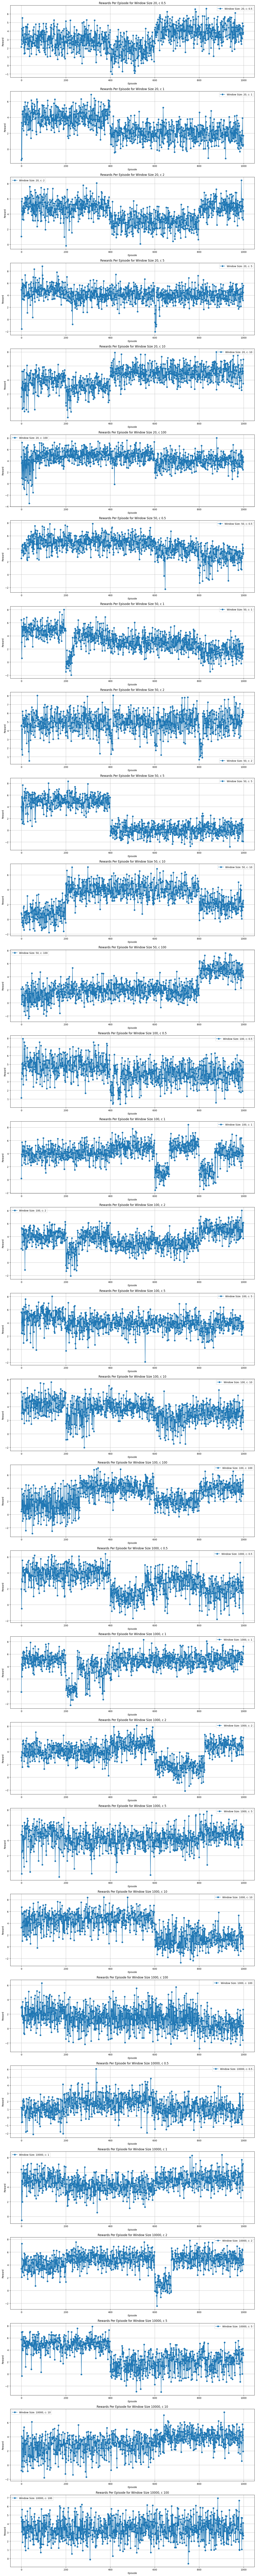

In [8]:

num_combinations = len(test_results)
plt.figure(figsize=(15, 5 * num_combinations))  # Adjust height dynamically based on number of combinations

for idx, ((window_size, c), data) in enumerate(test_results.items(), start=1):
    ax = plt.subplot(num_combinations, 1, idx)
    ax.plot(data['rewards_per_episode'], label=f'Window Size: {window_size}, c: {c}', marker='o', linestyle='-')
    ax.set_title(f'Rewards Per Episode for Window Size {window_size}, c {c}')
    ax.set_xlabel('Episode')
    ax.set_ylabel('Reward')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


In [9]:
moving_average = np.convolve(rewards, np.ones(rolling_window)/rolling_window, mode='valid')


NameError: name 'rewards' is not defined

In [ ]:
# Assuming results is a dictionary in the format: results[(window_size, c)] = {'average_reward': avg, 'rewards_per_episode': episodes}

# Organizing data by window size
from collections import defaultdict
import matplotlib.pyplot as plt

data_by_window_size = defaultdict(dict)
for (window_size, c), data in test_results.items():
    data_by_window_size[window_size][c] = data['rewards_per_episode']

# Colors or line styles for different c values, ensuring we have enough styles
line_styles = ['-', '--', '-.', ':']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
style_cycler = [(ls, col) for ls in line_styles for col in colors]


# Decay epsilon greedy:

In [ ]:
def calculate_regret(mab, cumulative_reward, t, print_=False):
    if mab.state is not None:
        optimal_reward = mab.means[mab.state][mab.get_optimal_action()] * t
    else:
        optimal_reward = mab.means[mab.get_optimal_action()] * t
    #if print_:
       # print("optimal reward at time step", t, ":", optimal_reward)
        #print("cumulative reward at time step", t, ":", cumulative_reward)
    return optimal_reward - cumulative_reward

 
def update_expected_reward(expected_reward,action_count,current_action,reward):
    expected_reward[current_action]+=(1/action_count[current_action]) * (reward-expected_reward[current_action])

def get_confidence_bounds(t,action_count):
    return np.sqrt(2*np.log(t)/action_count)
## here i am calculating the 


In [ ]:
def decaying_epsilon_greedy(mab,T,epsilon, alpha,print_=False):
    mab.reset()

    # initialise the expected reward and action count and cumulative reward
    expected_reward = np.ones(mab.k)*100
    action_count = np.zeros(mab.k)
    cumulative_rewards = 0
    
    for _ in range(T):
        if np.random.uniform(0,1) < epsilon:
            current_action = np.random.randint(mab.k)
        else:
            current_action = np.argmax(expected_reward)
            
        current_state = mab.step(current_action)        # maybe not state...
        cumulative_rewards += current_state[1]
        action_count[current_action] += 1
        update_expected_reward(expected_reward,action_count,current_action,current_state[1])
        epsilon*=alpha
    
    if print_:
        for i in range(mab.k):
            print("Expected reward action", i, ":", expected_reward[i], "Action count:", action_count[i])

    regret = calculate_regret(mab, cumulative_rewards, T,print_)   

    if print_:
        print('-------------------------------------\n\n')

    return np.argmax(expected_reward), regret

In [ ]:
print(decaying_epsilon_greedy(bandit_final_env,1000,0.5,0.99))

(2, -167.20138791448608)


In [ ]:
def epsilon_greedy(mab,T,epsilon,print_=False):
    mab.reset()

    # initialise the expected reward and action count and cumulative reward
    expected_reward = np.ones(mab.k)*1000
    action_count = np.zeros(mab.k)
    cumulative_rewards = 0
    regret2 = np.zeros(T)
    
    for t in range(T):
        if np.random.uniform(0,1) < epsilon:
            current_action = np.random.randint(mab.k)
        else:
            current_action = np.argmax(expected_reward)
            
        current_state = mab.step(current_action)        # maybe not state...
        cumulative_rewards += current_state[1]
        action_count[current_action] += 1
        update_expected_reward(expected_reward,action_count,current_action,current_state[1])
        regret2[t] = calculate_regret(mab, cumulative_rewards, t,print_)
    if print_:
        for i in range(mab.k):
            print("Expected reward action", i, ":", expected_reward[i], "Action count:", action_count[i])
            
        
    regret = calculate_regret(mab, cumulative_rewards, T,print_)   

    if print_:
        print("regert", regret2)
        print('-------------------------------------\n\n')

    return np.argmax(expected_reward), regret2


In [ ]:
def ucb(mab,T,c,print_=False):
    mab.reset()

    # initialise the expected reward and action count and cumulative reward
    expected_reward = np.zeros(mab.k)
    action_count = np.zeros(mab.k)
    cumulative_rewards =0

    # initialisation, pull each arm once and use the rewards to initialise the expected reward and action count
    # OBS! not a smart thing to do in real hospital setting, with trying drugs on patients ...
    # (needed to avoid dividing by zero in the first iteration)
    for i in range(mab.k):
        expected_reward[i] = mab.step(i)[1]
        action_count[i] += 1
    
    for t in range(mab.k+1,T+1):
        confidence_bounds = get_confidence_bounds(t,action_count)
        best_action = np.argmax(expected_reward + c*confidence_bounds)

        current_state = mab.step(best_action)        # maybe not state...
        cumulative_rewards += current_state[1]
        action_count[best_action] += 1
        update_expected_reward(expected_reward,action_count,best_action,current_state[1])
    
    if print_:
        for i in range(mab.k):
            print("Expected reward action", i, ":", expected_reward[i], "Action count:", action_count[i])
        
    regret = calculate_regret(mab, cumulative_rewards, T,print_)   

    if print_:
        print('-------------------------------------\n\n')

    return np.argmax(expected_reward), regret

ucb(bandit_final_env,1000,0.5)

(0, -301.29509995969147)

In [ ]:
def run_experiments(mab, T, epsilon, alpha, c, print_=False):
    eps_greed=epsilon_greedy(mab,T,epsilon,print_)
    
    
    dec_greed=decaying_epsilon_greedy(mab,T,epsilon,alpha,print_)
    ucb_res=ucb(mab,T,c,print_)
    if print_:
        print(f'epsilon greedy:          medicine: {eps_greed[0]}  regret: {eps_greed[1]}')
        print(f'decaying epsiol greedy:  medicine: {dec_greed[0]}  regret: {dec_greed[1]}')
        print(f'ucb:                     medicine: {ucb_res[0]}  regret: {ucb_res[1]}')
        print('-------------------------------------\n')
    return eps_greed,dec_greed,ucb_res

run_experiments(bandit_final_env,1000,0.5,0.99,0.5,True)